In [24]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy import stats

In [2]:
F = 100; #N
g0 = 9.81; #m/s2
Isp = 345;

mdotprop = F/(Isp * g0)
print('mdotprop: ', mdotprop)

OF = 2;
mdotfuel = mdotprop/(1+OF)
mdotox   = mdotprop - mdotfuel

print('mdotfuel: ', mdotfuel)
print('mdotox: ', mdotox)

mdotprop:  0.029546898314349448
mdotfuel:  0.00984896610478315
mdotox:  0.019697932209566296


In [3]:
Gox = 700; #kg/(m2s)
import math
Dp0 = math.sqrt(4*mdotox/(math.pi*Gox))
print('Initial port diameter: ', Dp0)

Initial port diameter:  0.005985719462512696


In [4]:
#picked Dp0 = 0.25 in 
Dp0 = 0.25*25.4e-3;

Gox = 4*mdotox/(math.pi*Dp0**2)

print('Gox: ', Gox)

Gox:  621.9898627002863


In [17]:
#calculate rdot
regrate = pd.DataFrame(columns=['name','a','n'])

regrate_catwell = {'a': 2.11e-5, 'n':0.615,'name': 'Stanford'}
regrate_TMIT = {'a': 0.0000276, 'n':0.518,'name': 'TMIT'}
regrate_JPL1 = {'a': 8.96e-5,'n':0.35, 'name': 'JPL Non-Linear'}
regrate_catwell = {'a': 2.11e-5, 'n':0.615,'name': 'Catwell'}
regrate=regrate.append(regrate_catwell,ignore_index=True)
regrate=regrate.append(regrate_JPL1,ignore_index=True)
regrate=regrate.append(regrate_JPL2,ignore_index=True)
regrate=regrate.append(regrate_TMIT,ignore_index=True)

In [22]:
regrate["rdot"]=regrate['a']*620**regrate["n"]

In [35]:
regrate[['a','n','rdot','name']]

,a,n,rdot,name
0,0.000021,0.615,0.001101,Catwell
1,0.000090,0.350,0.000850,JPL Non-Linear
2,0.000058,0.470,0.001195,JPL Averaged
3,0.000028,0.518,0.000772,TMIT


In [36]:
rdot = stats.mstats.gmean(list(regrate['rdot']))

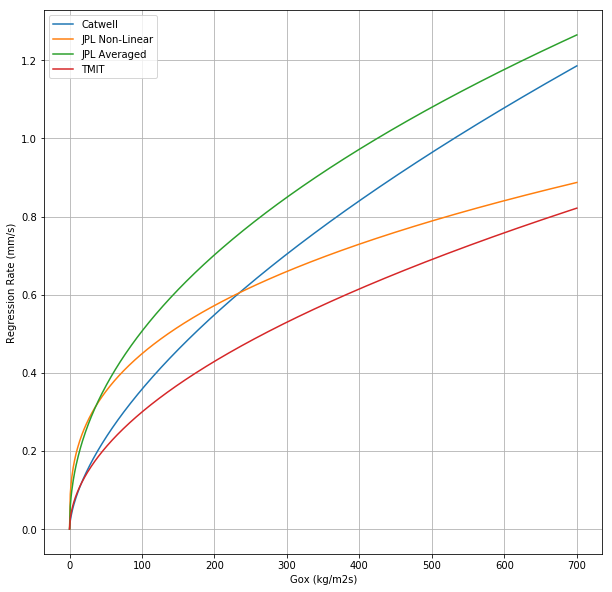

In [14]:
Grange = list(range(0,701,1))

plt.figure(figsize=(10,10))
for i in range(len(regrate)):
    rdot = [1000*regrate['a'].loc[i] * g**regrate['n'].loc[i] for g in Grange]
    plt.plot(Grange, rdot, label=regrate['name'].loc[i])
    
#
plt.ylabel('Regression Rate (mm/s)');
plt.grid(True)
plt.xlabel('Gox (kg/m2s)')
plt.legend(loc='upper left')


In [38]:
rhof = 1.1852*1000;

L = mdotfuel/(math.pi*rhof*Dp0*rdot)

In [39]:
L

0.43219976530692439